In [1]:
import sys
sys.path.insert(0, "../../src/")
from framework import *
from algorithms import pso, differential_evolution, dual_annealing, mlsl, ipop_cmaes, nelder_mead_multi

save_handler = SaveHandlerJSON('../../result/june/')

best_instances = []

In [2]:
pso.load_best_instance('../../result/june.db')
# pso.best_instance.algorithm.name = "PSO"
best_instances.append((pso.best_instance, ['population_size']))

In [3]:
differential_evolution.load_best_instance('../../result/june.db')
best_instances.append((differential_evolution.best_instance, ['dithering', 'polish', 'popsize']))

In [4]:
dual_annealing.load_best_instance('../../result/june.db')
best_instances.append((dual_annealing.best_instance, []))
# dual_annealing.best_instance.run(
#     save_handler=save_handler,
#     save_partial=False,
#     restart=True,
#     does_prune=False,
# )

In [5]:
mlsl.load_best_instance('../../result/june.db')
best_instances.append((mlsl.best_instance, ['population']))
# mlsl.best_instance.run(
#     save_handler=save_handler,
#     save_partial=False,
#     restart=True,
#     does_prune=False,
# )

In [6]:
ipop_cmaes.load_best_instance('../../result/apr.db')
# ipop_cmaes.best_instance.algorithm.name = 'IPOP-CMA-ES'
best_instances.append((ipop_cmaes.best_instance, ['popsize_coeff', 'popsize0']))
ipop_cmaes.best_instance.run(
    save_handler=save_handler,
    save_partial=False,
    restart=True,
    does_prune=False,
)

100%|██████████| 1000000/1000000 [03:55<00:00, 4245.56it/s]


In [7]:
nelder_mead_multi.load_best_instance('../../result/june.db')
# nelder_mead_multi.best_instance.algorithm.name = "Nelder-Mead"
best_instances.append((nelder_mead_multi.best_instance, []))
# nelder_mead_multi.best_instance.run(
#     save_handler=save_handler,
#     save_partial=False,
#     restart=True,
#     does_prune=False,
# )

pso
& \texttt{sigma0} & \(1.13 \times 10^{5}\) \\
& \texttt{r} & \(4.24 \times 10^{-1}\) \\
& \texttt{population\_size} & 938 \\
pso	& 20	& 0\%	& 1245	& \( +\infty \) 	& \(2.70 \times 10^{4}\) \\
Differential Evolution
& \texttt{popsize} & 11 \\
& \texttt{recombination} & \(6.19 \times 10^{-1}\) \\
& \texttt{polish} & False \\
& \texttt{dithering} & True \\
& \texttt{mutation\_low} & \(2.48 \times 10^{-1}\) \\
& \texttt{mutation\_high} & \(1.06 \times 10^{0}\) \\
Differential Evolution	& 82	& 99\%	& 1342	& \(1.24 \times 10^{4}\) 	& \(1.23 \times 10^{3}\) \\
Dual Annealing
& \texttt{initial\_temp} & \(9.01 \times 10^{3}\) \\
& \texttt{restart\_temp\_ratio} & \(2.50 \times 10^{-3}\) \\
& \texttt{visit} & \(2.48 \times 10^{0}\) \\
& \texttt{accept} & \(-5.01 \times 10^{-1}\) \\
Dual Annealing	& 28	& 46\%	& 1324	& \(7.97 \times 10^{4}\) 	& \(5.89 \times 10^{3}\) \\
MLSL
& \texttt{population} & 4 \\
MLSL	& 22	& 18\%	& 1313	& \(2.55 \times 10^{5}\) 	& \(1.05 \times 10^{4}\) \\
IPOP_CMAES
& \

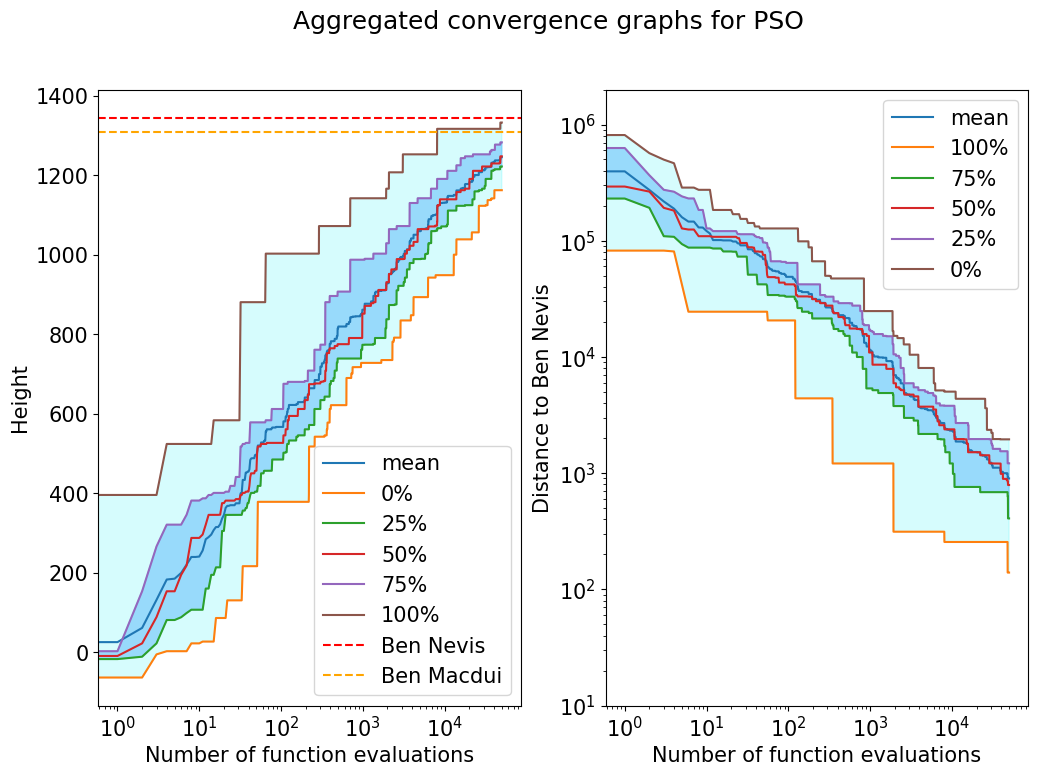

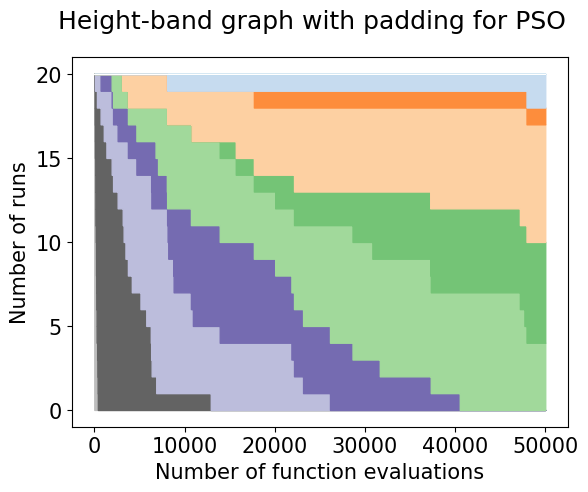

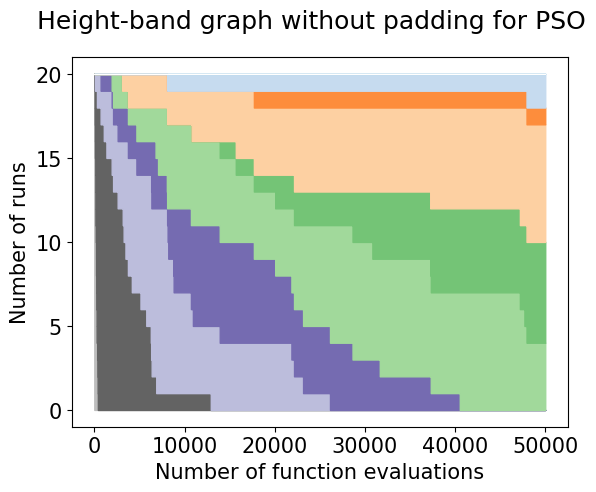

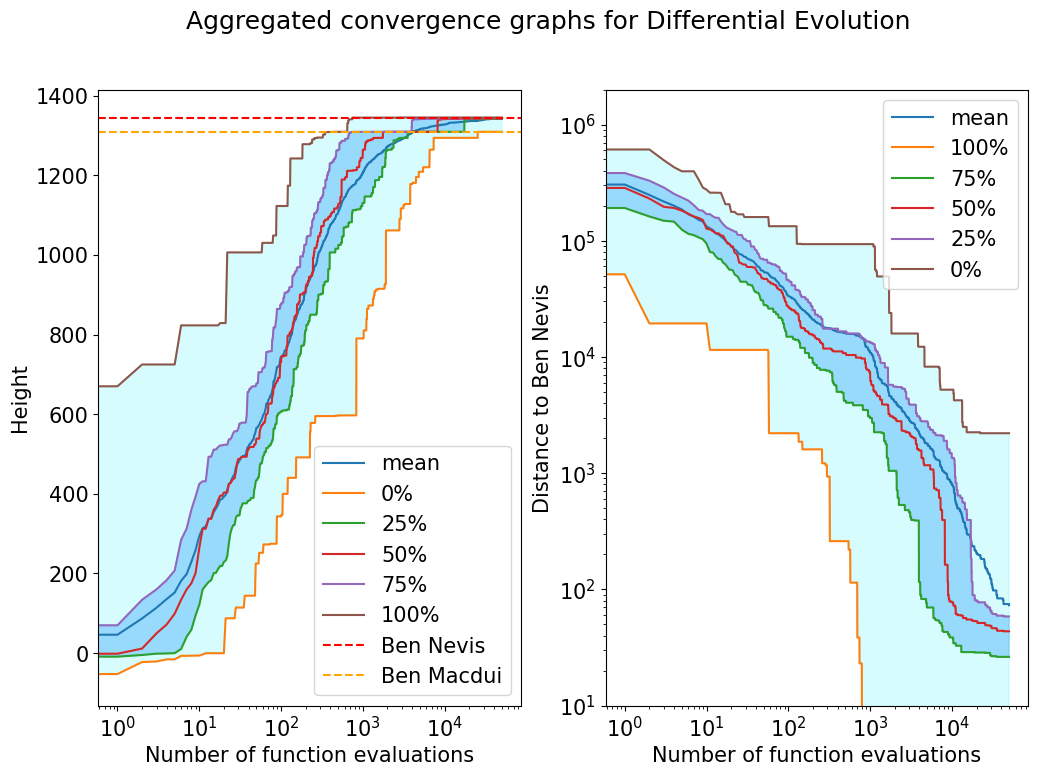

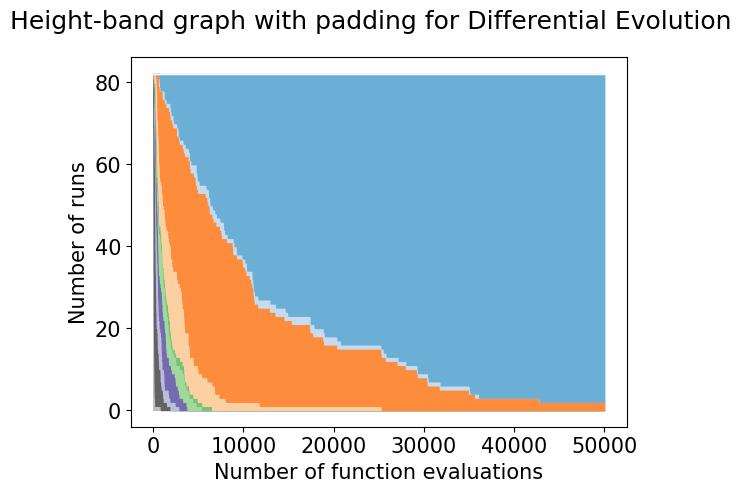

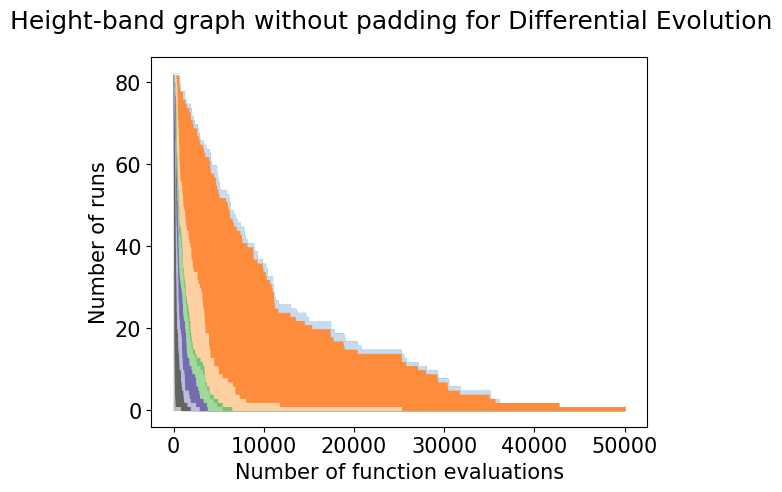

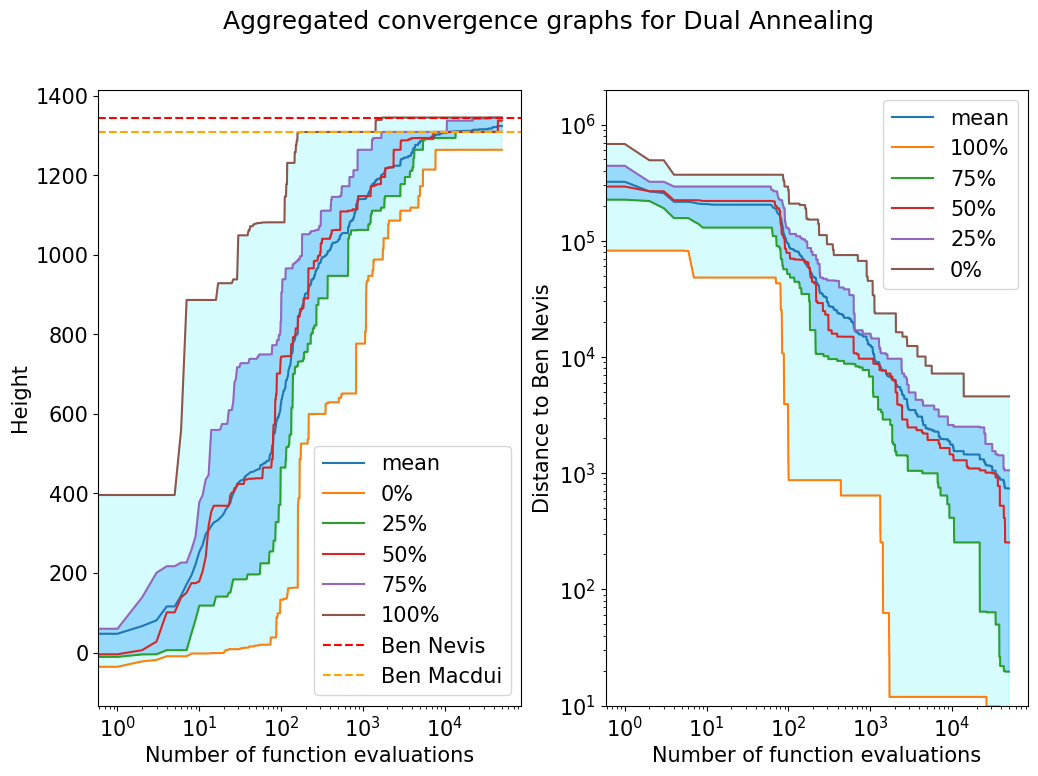

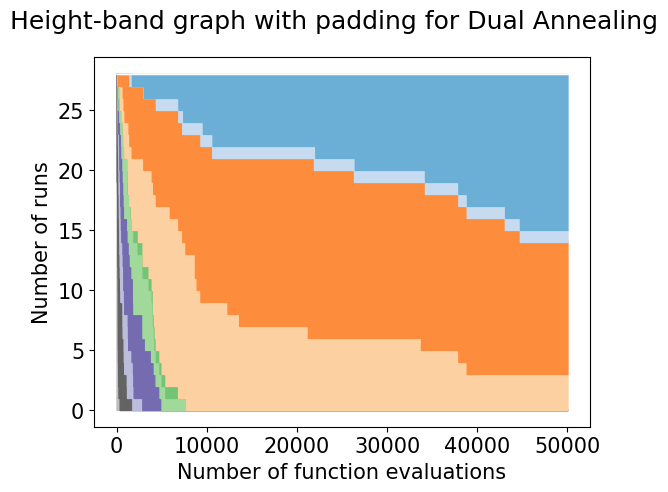

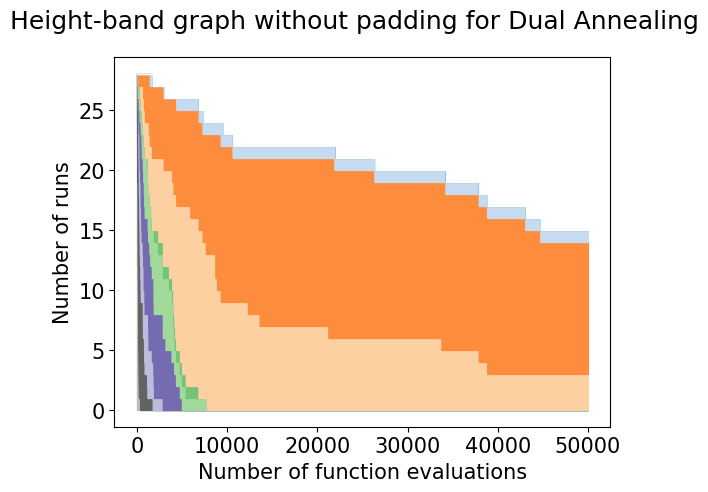

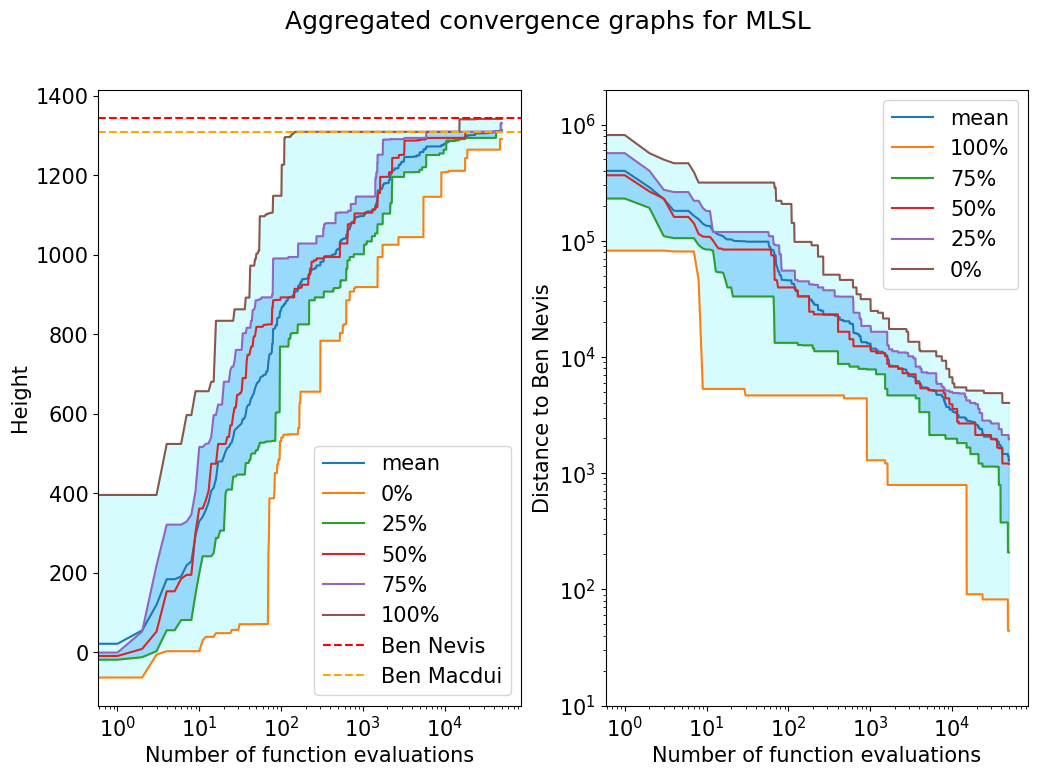

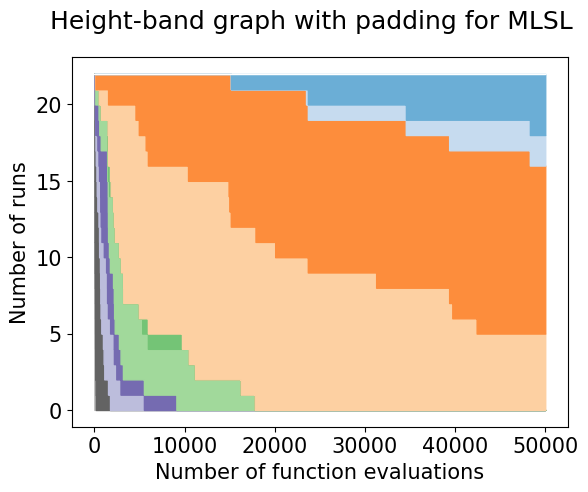

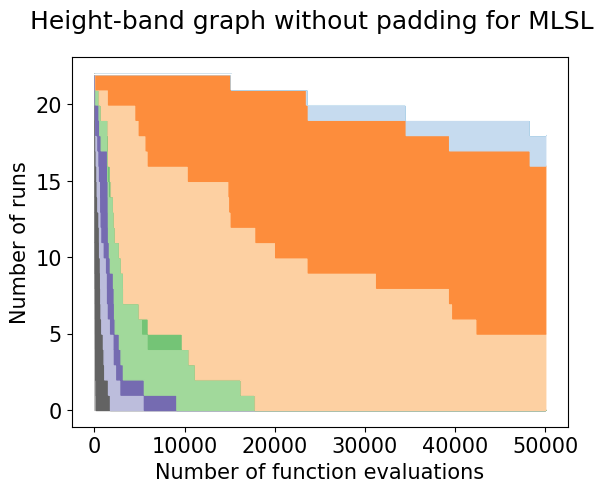

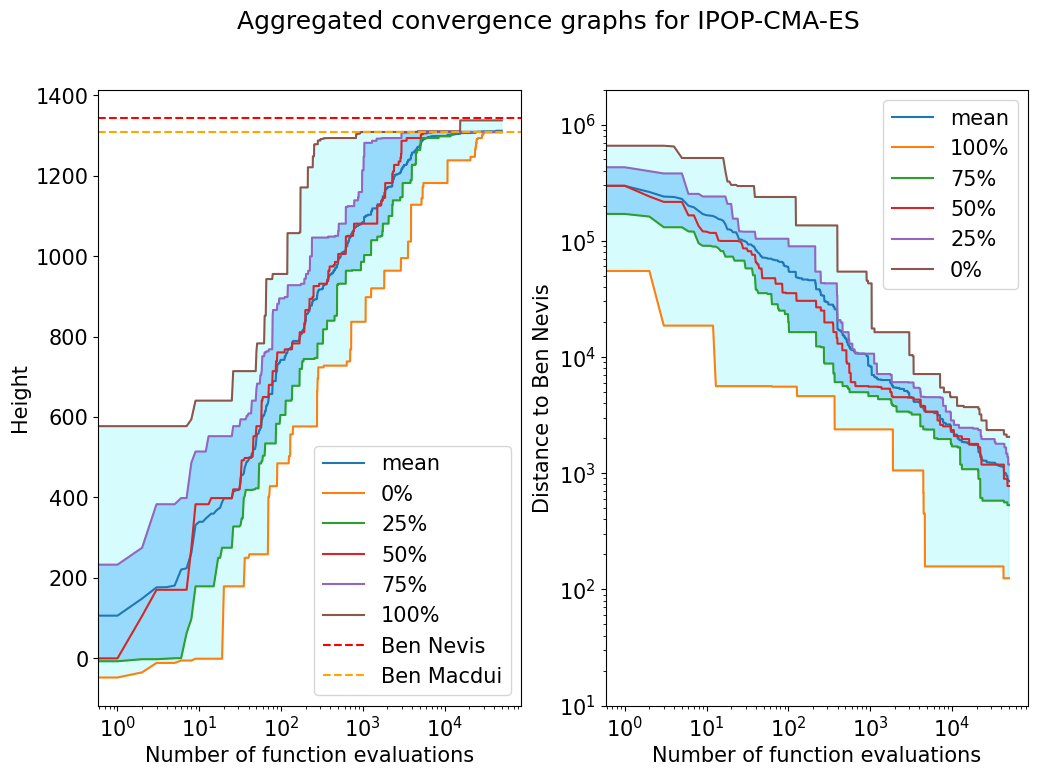

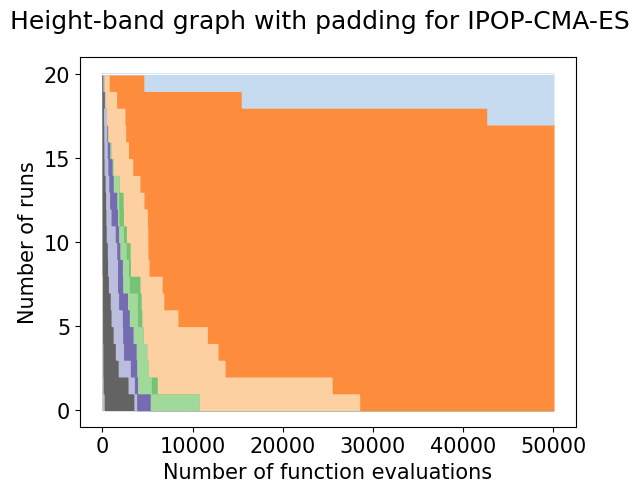

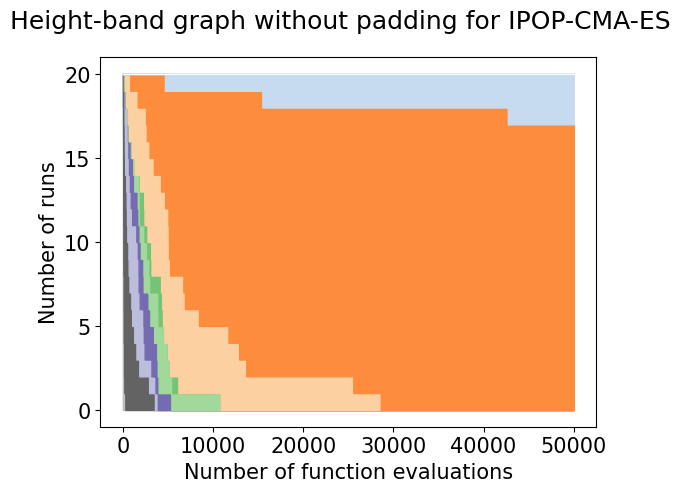

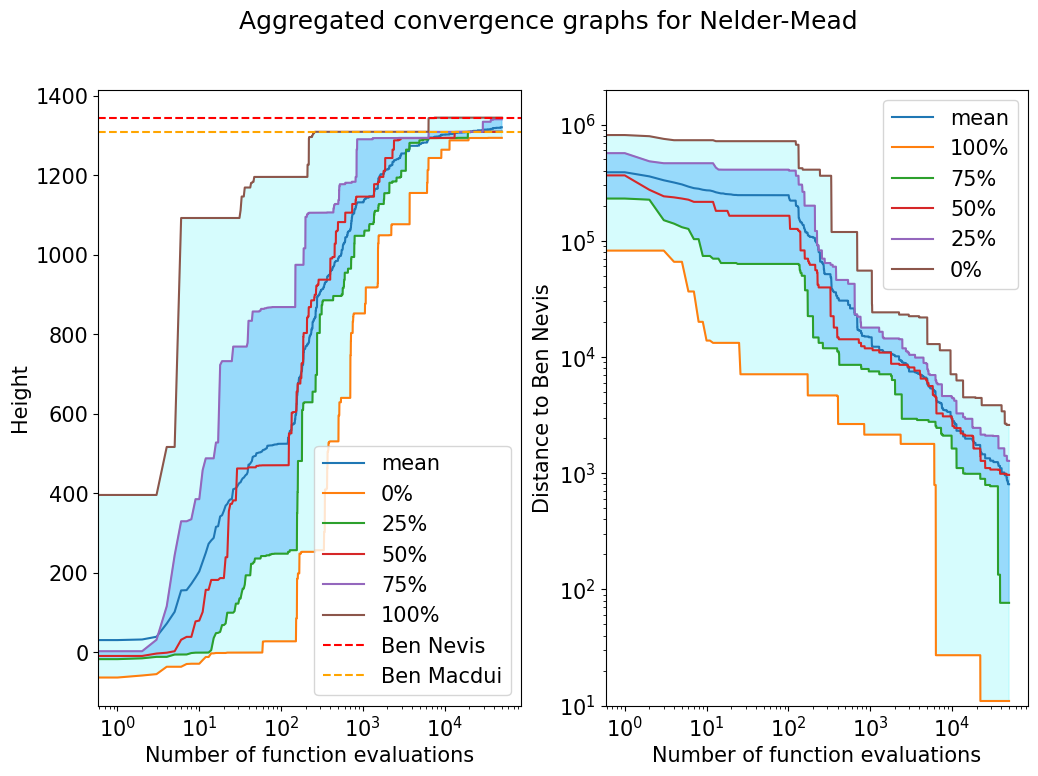

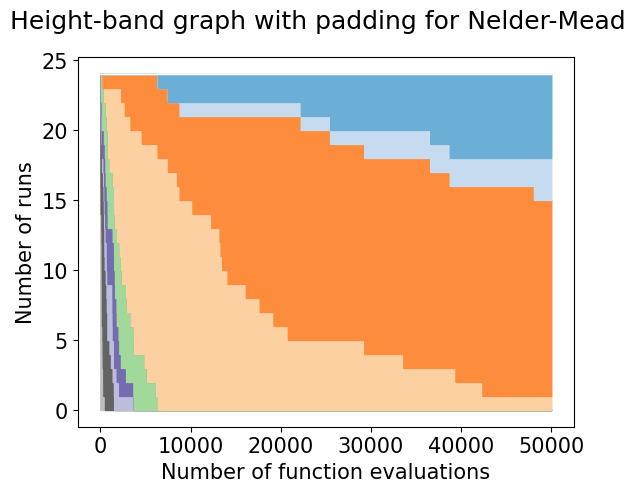

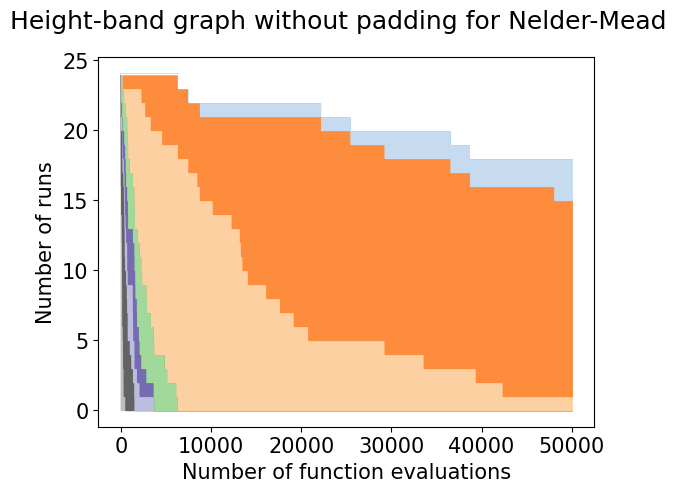

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
for ins, int_fields in best_instances:
    ins: AlgorithmInstance
    name = ins.algorithm.name
    ins.cache_enabled = True
    if not name.startswith('IPOP'):
        ins.load_results(save_handler=save_handler, partial=False)
    print(name)
    ins.params_to_latex(int_fields=int_fields)
    
    ins.performance_to_latex()
    if name == 'pso':
        ins.algorithm.name = 'PSO'
    if name.startswith('Nelder'):
        ins.algorithm.name = 'Nelder-Mead'
    if name.startswith('IPOP'):
        ins.algorithm.name = 'IPOP-CMA-ES'
    ins.plot_convergence_graph(img_path=f'./imgs/agg-{name}.png')
    ins.plot_stacked_graph(img_path=f'./imgs/hbwp-{name}', with_legends=False)
    ins.plot_stacked_graph(mode='terminate', img_path=f'./imgs/hbwop-{name}', with_legends=False)
    
    print('\n========')

In [9]:
ipop_cmaes.best_instance.performance_measures()
ipop_cmaes.best_instance.results

[{'algorithm_name': 'IPOP_CMAES', 'algorithm_version': 1, 'instance_index': 261, 'result_index': 0, 'ret_point': [216784.09306556836, 771248.3665425222], 'ret_height': 1336.942532798624, 'message': '', 'is_success': False, 'eval_num': 50000, 'len_points': 50470, 'gary_score': 7, 'info': {'algorithm_name': 'IPOP_CMAES', 'algorithm_version': 1, 'instance_index': 261, 'result_index': 0}},
 {'algorithm_name': 'IPOP_CMAES', 'algorithm_version': 1, 'instance_index': 261, 'result_index': 1, 'ret_point': [298875.4987406337, 798925.0217205822], 'ret_height': 1309.0973307926254, 'message': '', 'is_success': False, 'eval_num': 50000, 'len_points': 50253, 'gary_score': 3, 'info': {'algorithm_name': 'IPOP_CMAES', 'algorithm_version': 1, 'instance_index': 261, 'result_index': 1}},
 {'algorithm_name': 'IPOP_CMAES', 'algorithm_version': 1, 'instance_index': 261, 'result_index': 2, 'ret_point': [298877.79572095023, 798907.9144498952], 'ret_height': 1307.8113330825784, 'message': '', 'is_success': False

In [10]:
ipop_cmaes.best_instance.performance_to_latex()

IPOP-CMA-ES	& 20	& 0\%	& 1312	& \( +\infty \) 	& \(1.39 \times 10^{4}\) \\

In [11]:
pso.best_instance.params_to_latex()

& \texttt{sigma0} & \(1.13 \times 10^{5}\) \\
& \texttt{r} & \(4.24 \times 10^{-1}\) \\
& \texttt{population\_size} & \(9.38 \times 10^{2}\) \\


In [12]:
ins = differential_evolution.best_instance
ins.cache_enabled = True
len(ins.restart_results)

82

In [13]:
res = ins.restart_results[0]

In [14]:
res.end_of_iterations

[660,
 1738,
 2420,
 3124,
 4246,
 5214,
 6182,
 6842,
 7678,
 8470,
 9284,
 10032,
 11330,
 12430,
 13310,
 14388,
 15070,
 15796,
 16412,
 17336,
 17952,
 19008,
 19998,
 20746,
 21626,
 22836,
 23694,
 24552,
 25652,
 26334,
 27610,
 28380,
 29238,
 30008,
 30756,
 31658,
 32472,
 33462,
 34364,
 35200]

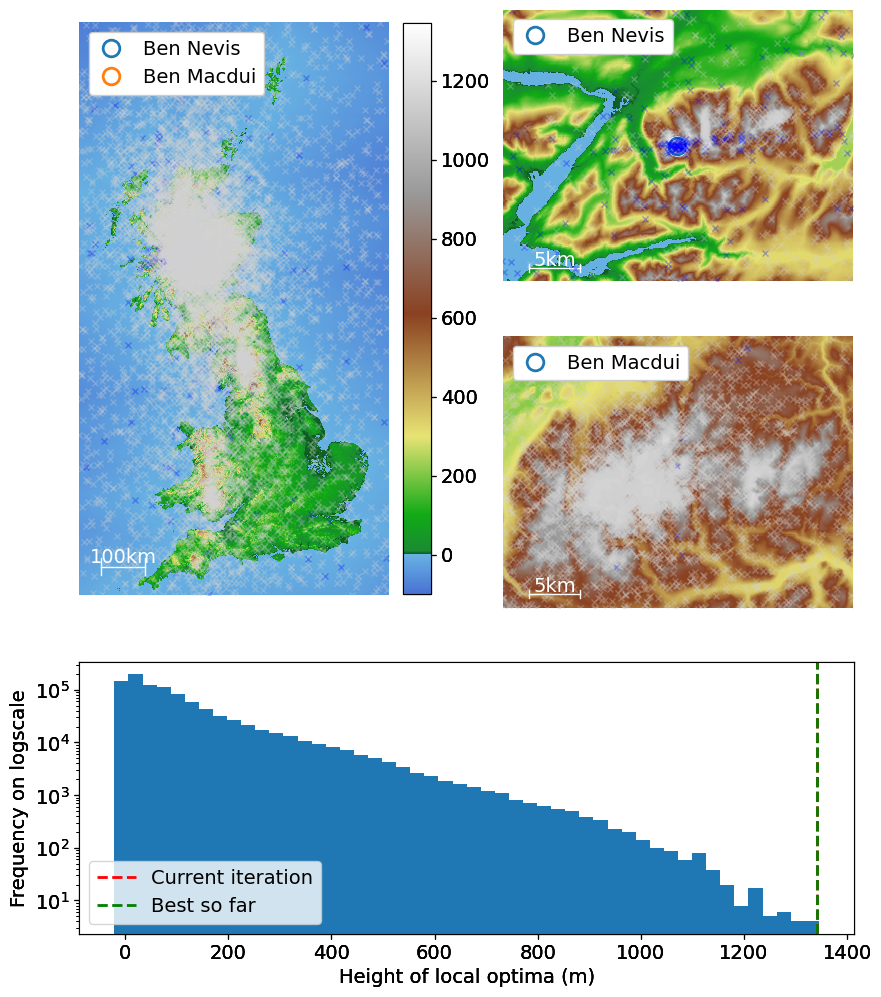

In [15]:
import numpy as np
maxima_heights = np.load('../../basin-problem/res/maxima_heights.npy')

from framework import ResultAnimation

# we only render the first 20 frames for demonstration;
# for the full video, change frame_num to None
result_animation = ResultAnimation(res, maxima_heights, mode='iterations')
result_animation.save(file_name='de.mp4', fps=5)